# HW3-2 - Travel Review Ratings 

作業檔案：
- hw3-2.ipynb

資料：
https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings

- google_review_ratings.csv

參考網站：有
- https://www.kaggle.com/ishbhms/travel-rating-reviews-analysis

## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Ubuntu|18.04 LTS|
|程式執行環境|jupyter notebook|1.0.0|
|python 版本|python3|3.6.9|
|安裝環境|pip|20.1|

## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|6|
|記憶體需求|$\leq 4$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

## 觀察資料型態與分佈

首先快速檢視資料的特徵，共有25個欄位：

- User
- Category 1 ~ 24

User欄位即為每筆資料的id，Category 1 ~ 24為該使用者對各個種類景點的評分，數值範圍1 ~ 5，0則代表未評分。

In [1]:
# Read data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = './google_review_ratings.csv'

df = pd.read_csv(data_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

發現存在奇怪的欄位(第25欄)，以及Category 11資料型態跟其他人不同，檢查後發現似乎是有資料填壞的情形，因為填壞的資料僅2筆，故決定直接刪除。另外為了方便辨認，將原本的Category 1 ~ 24重新命名成它原本的名字。

In [2]:
df = df[df.iloc[:, 25].isna() == True]
df = df.drop(df.columns[25], axis=1)
df['Category 11'] = pd.to_numeric(df['Category 11'])
column_names = ['user', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
df.columns = column_names
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user                   5454 non-null   object 
 1   churches               5454 non-null   float64
 2   resorts                5454 non-null   float64
 3   beaches                5454 non-null   float64
 4   parks                  5454 non-null   float64
 5   theatres               5454 non-null   float64
 6   museums                5454 non-null   float64
 7   malls                  5454 non-null   float64
 8   zoo                    5454 non-null   float64
 9   restaurants            5454 non-null   float64
 10  pubs_bars              5454 non-null   float64
 11  local_services         5454 non-null   float64
 12  burger_pizza_shops     5454 non-null   float64
 13  hotels_other_lodgings  5454 non-null   float64
 14  juice_bars             5454 non-null   float64
 15  art_

看看有哪些欄位是使用者不太會給評分的，結果發現麵包店、健身房、美容spa的評分數量是倒數前三名。

Text(0.5, 1.0, 'Number of reviews under each category')

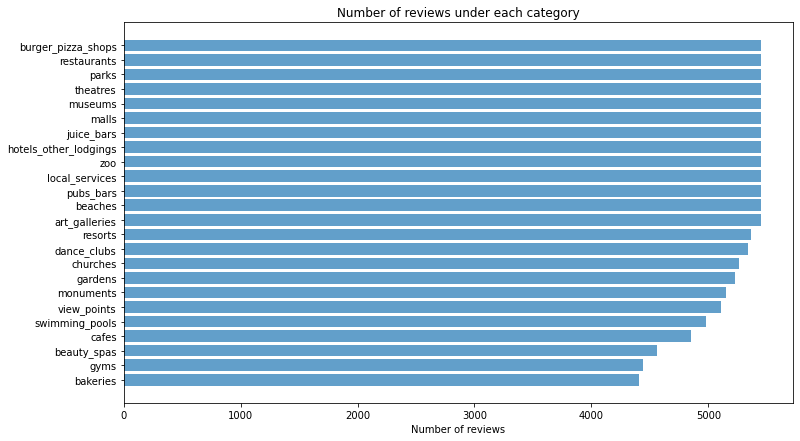

In [3]:
num_zeros = df[column_names[1:]].astype(bool).sum(axis=0).sort_values()

plt.figure(figsize=(12,7))
plt.barh(np.arange(len(column_names[1:])), num_zeros.values, align='center', alpha=0.7)
plt.yticks(np.arange(len(column_names[1:])), num_zeros.index)
plt.xlabel('Number of reviews')
plt.title('Number of reviews under each category')

再來看看各欄位的平均評分，結果發現商場、餐廳、戲院為最高前三名；健身房、游泳池、咖啡館為倒數前三名。

Text(0.5, 1.0, 'Average rating per Category')

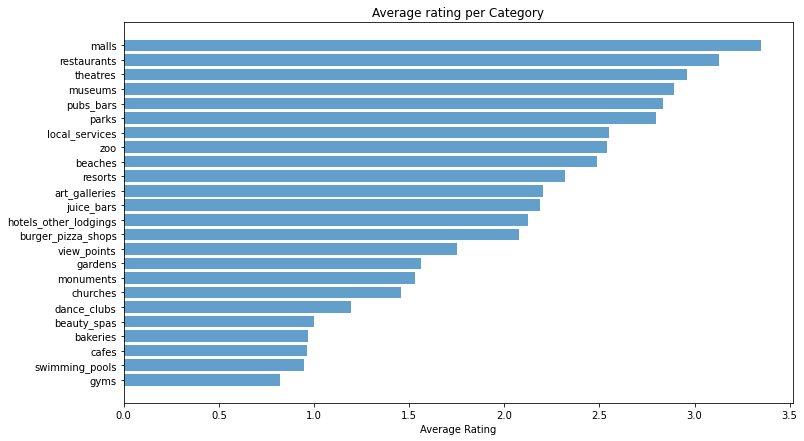

In [4]:
avg_rating = df[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()
plt.figure(figsize=(12,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.7)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

檢視各欄位間的相關性，各欄資料間的相關性不算高，但仍可以發現鄰近類別（如商場與餐廳）的相關性高，以及教堂與庭園的相關性也偏高。

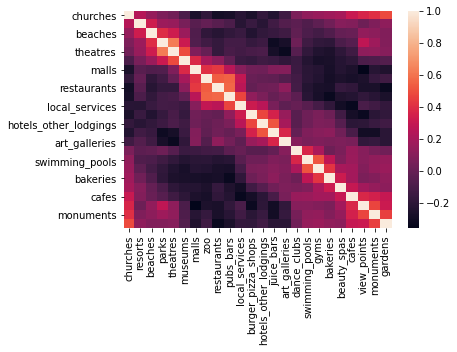

In [5]:
sns.heatmap(df[1:].corr())

## 問題設定

這裡設定的問題是，能否利用使用者對其他類別的評價，來預測他在另外某些類別中最喜歡哪個？具體來說，這裡希望利用其他的21個類別來預測該使用者在商場、餐廳、戲院這三樣中最喜歡哪個，會選這三樣的原因在於它們是所有樣本中平均評分最高的三個類別，並且所有使用者都有對這三樣做評分，因此不需要考慮訓練標籤不存在的問題。

## 資料前處理
### 製作訓練標籤

將該使用者於商場、餐廳、戲院中評價最高的那一個類別紀錄於新欄位，當有兩個類別同分時，則會按照所有人的平均分數最高的來依序選定，也就是同分時依照商場 > 餐廳 > 戲院的順序來選定。

In [6]:
x_df = df.drop(['user', 'malls', 'restaurants', 'theatres'], axis=1)
y_df = df[['malls', 'restaurants', 'theatres']]

y_df = y_df.idxmax(axis=1)

print(y_df.head())

0    malls
1    malls
2    malls
3    malls
4    malls
dtype: object


### 資料正規化

將資料範圍線性轉換到[0,1]。

In [7]:
# Regularize data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_df)

scaled_x_df = scaler.transform(x_df)

scaled_x_df = pd.DataFrame(scaled_x_df)
scaled_x_df.columns = ['churches', 'resorts', 'beaches', 'parks', 'museums', 'zoo', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

scaled_x_df.head()

,churches,resorts,beaches,parks,museums,zoo,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.0,0.0,0.726,0.676259,0.465296,0.359903,0.436754,0.218009,0.21564,0.219858,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.726,0.676259,0.465296,0.429952,0.439141,0.218009,0.21564,0.219858,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.726,0.671463,0.465296,0.429952,0.436754,0.218009,0.21564,0.219858,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
3,0.0,0.1,0.726,0.671463,0.465296,0.359903,0.436754,0.225118,0.21564,0.219858,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.726,0.671463,0.465296,0.429952,0.436754,0.218009,0.21564,0.219858,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0


將所有資料的25％作為測試資料，剩餘75％作為訓練資料。

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(scaled_x_df, y_df, test_size=0.25, random_state=109)

print('---- Training Data ----')
print(train_x.shape)
print(train_y.head())
print('\n---- Testing Data ----')
print(test_x.shape)
print(test_y.head())

---- Training Data ----
(4090, 21)
2479    restaurants
513        theatres
3572          malls
210     restaurants
4050       theatres
dtype: object

---- Testing Data ----
(1364, 21)
2185          malls
763     restaurants
1829       theatres
1611          malls
1812       theatres
dtype: object


## 資料訓練與測試
### KNN

利用KNN來做分類，在k=5的情況下，訓練精度達0.849，測試精度達0.781，在尚未調整任何參數的情況下算是不錯的開始，但有點overfitting。

In [9]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(train_x, train_y)

knn_training_acc = neigh.score(train_x, train_y)
print('training accuracy: {}'.format(knn_training_acc))

knn_predict_test_result = neigh.predict(test_x)
knn_testing_acc = neigh.score(test_x, test_y)
print('testing accuracy: {}'.format(knn_testing_acc))

print('\npredicted testing labels:')
print(knn_predict_test_result)

training accuracy: 0.8488997555012225
testing accuracy: 0.780791788856305

predicted testing labels:
['malls' 'restaurants' 'restaurants' ... 'malls' 'theatres' 'restaurants']


### SVM

利用SVM來做分類器，訓練精度達0.803，測試精度達0.782，在尚未調整任何參數的情況下比knn好一些，且沒有overfitting。

In [10]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(train_x, train_y)

svc_training_acc = svc_model.score(train_x, train_y)
print('training accuracy: {}'.format(svc_training_acc))

svc_predict_test_result = svc_model.predict(test_x)
svc_testing_acc = svc_model.score(test_x, test_y)
print('testing accuracy: {}'.format(svc_testing_acc))

print('\npredicted testing labels:')
print(knn_predict_test_result)

training accuracy: 0.8031784841075794
testing accuracy: 0.781524926686217

predicted testing labels:
['malls' 'restaurants' 'restaurants' ... 'malls' 'theatres' 'restaurants']


### 小結

初步使用沒有調過任參數的兩種分類器，測試精度都在約0.78，算是不錯，接下來將調整細部參數來提昇各自的精度。

## 模型精度提昇
### KNN

首先選擇距離的定義，也就是決定使用曼哈頓距離或歐式距離，根據

https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions/99191#99191

這篇文章，在特徵維度較高時使用曼哈頓距離會比較好，實際測試結果也是如此。

In [11]:
neigh = KNeighborsClassifier(p=1)
neigh.fit(train_x, train_y)
knn_training_acc = neigh.score(train_x, train_y)
knn_predict_test_result = neigh.predict(test_x)
knn_testing_acc = neigh.score(test_x, test_y)
print('---- Manhattan distance ----')
print('training accuracy: {}'.format(knn_training_acc))
print('testing accuracy: {}'.format(knn_testing_acc))

neigh = KNeighborsClassifier(p=2)
neigh.fit(train_x, train_y)
knn_training_acc = neigh.score(train_x, train_y)
knn_predict_test_result = neigh.predict(test_x)
knn_testing_acc = neigh.score(test_x, test_y)
print('\n---- Euclidean distance ----')
print('training accuracy: {}'.format(knn_training_acc))
print('testing accuracy: {}'.format(knn_testing_acc))

---- Manhattan distance ----
training accuracy: 0.8731051344743276
testing accuracy: 0.8137829912023461

---- Euclidean distance ----
training accuracy: 0.8488997555012225
testing accuracy: 0.780791788856305


接著選擇最佳的k，經過由k = 2 ~ 30的逐一測試後，發現測試精度在k=3時達到最高，約0.7837。

In [12]:
k = 30

knn_training_acc = []
knn_testing_acc = []
for i in range(2, k):
    neigh = KNeighborsClassifier(n_neighbors=i, p=1)
    neigh.fit(train_x, train_y)
    knn_training_acc.append(neigh.score(train_x, train_y))
    knn_predict_test_result = neigh.predict(test_x)
    knn_testing_acc.append(neigh.score(test_x, test_y))


Reaches highest testing accuracy 0.8247800586510264 when k = 3


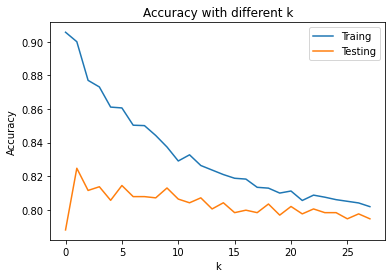

In [13]:
plt.plot(np.transpose([knn_training_acc, knn_testing_acc]))
plt.xticks()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy with different k')
plt.legend(['Traing', 'Testing'])

print('Reaches highest testing accuracy {} when k = {}'.format(np.max(knn_testing_acc), np.argmax(knn_testing_acc)+2))

總結上述，當k=3並使用曼哈頓距離時，對模型訓練能達到更好的效果，測試精度提昇了約0.044。

### SVM

首先選擇kernel要使用的方法，直接暴力的把package提供的方法全部試一次，發現使用poly及rbf的效果比linear和sigmoid還要好。

In [14]:
method = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in method:
    print('---- Kernel: {} ----'.format(ker))
    svc_model = SVC(kernel=ker)
    svc_model.fit(train_x, train_y)

    svc_training_acc = svc_model.score(train_x, train_y)
    print('training accuracy: {}'.format(svc_training_acc))

    svc_predict_test_result = svc_model.predict(test_x)
    svc_testing_acc = svc_model.score(test_x, test_y)
    print('testing accuracy: {}\n'.format(svc_testing_acc))

---- Kernel: linear ----
training accuracy: 0.6735941320293398
testing accuracy: 0.6730205278592375

---- Kernel: poly ----
training accuracy: 0.8254278728606357
testing accuracy: 0.7778592375366569

---- Kernel: rbf ----
training accuracy: 0.8031784841075794
testing accuracy: 0.781524926686217

---- Kernel: sigmoid ----
training accuracy: 0.3929095354523227
testing accuracy: 0.40249266862170086



調整poly方法的degree看看會不會比rbf好，因為若degree = 1就幾乎相當linear，因此從2開始測試到9為止。由結果可以明顯發現，訓練資料的精度快速提升，而測試資料則提升不顯著，這是overfitting的現象，最後取測試精度最高的degree = 5回來與rbf比較，發現結果較rbf好，因此kernel就選定用poly。

In [15]:
svc_training_acc = []
svc_testing_acc = []

for deg in range(2, 10):
    svc_model = SVC(kernel='poly', degree=deg)
    svc_model.fit(train_x, train_y)

    svc_training_acc.append(svc_model.score(train_x, train_y))

    svc_predict_test_result = svc_model.predict(test_x)
    svc_testing_acc.append(svc_model.score(test_x, test_y))

Reaches highest testing accuracy 0.7851906158357771 when degree = 5


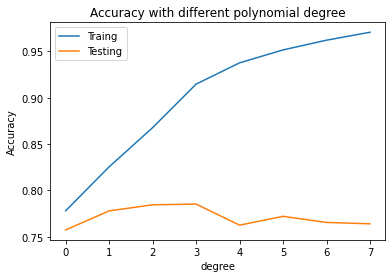

In [16]:
plt.plot(np.transpose([svc_training_acc, svc_testing_acc]))
plt.xticks()
plt.xlabel('degree')
plt.ylabel('Accuracy')
plt.title('Accuracy with different polynomial degree')
plt.legend(['Traing', 'Testing'])

print('Reaches highest testing accuracy {} when degree = {}'.format(np.max(svc_testing_acc), np.argmax(svc_testing_acc)+2))

調整參數C，代表hyperplane切下去後與資料間的margin大小，C愈大則margin愈小，反之則margin愈大，這裡取0.1 ~ 2.0的範圍間，每0.1測試一次C，最後發現在C = 1.1時有最好的精度，約0.7881。

In [17]:
svc_training_acc = []
svc_testing_acc = []
c_space = np.arange(0.1, 2.1, 0.1)

for C in c_space:
    svc_model = SVC(kernel='poly', degree=5, C=C)
    svc_model.fit(train_x, train_y)

    svc_training_acc.append(svc_model.score(train_x, train_y))

    svc_predict_test_result = svc_model.predict(test_x)
    svc_testing_acc.append(svc_model.score(test_x, test_y))

Reaches highest testing accuracy 0.7881231671554252 when C = 1.1


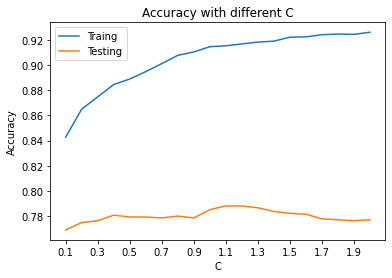

In [18]:
plt.plot(np.transpose(c_space), np.transpose([svc_training_acc, svc_testing_acc]))
plt.xticks(np.arange(0.1, 2.1, 0.2))
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy with different C')
plt.legend(['Traing', 'Testing'])

print('Reaches highest testing accuracy {} when C = {}'.format(np.max(svc_testing_acc), np.argmax(svc_testing_acc)/10+0.1))

總結上述，當kernel使用poly、degree=5，且C=1.1時，對模型訓練能達到稍微更好的效果，但其實與什麼都不調相去不遠，測試精度只提昇了約0.007。

# 總結

上述2種分類方法的測試結果如下：

|分類方法|預設超參數|調整超參數後|提升精度|
|:---:|---:|---:|---:|
|KNN|0.7808|0.8248|0.0440|
|SVM|0.7815|0.7881|0.0066|

可以看出KNN與SVM一開始的表現幾乎相同，但在調整超參數後KNN的表現明顯較SVM好，有可能是調整的工夫不到家，也有可能是這筆資料就是比較適合使用KNN。縱使如此，仍然解決了一開始設定的問題，我們可以使用KNN或SVM來預測使用者在商場、餐廳、戲院中最喜歡哪個，使用KNN精度可以達到80％以上，算是可以接受的成果。